# 다항회귀를 구현해보자

PolynomialFeatures를 이용해 단항값 [$x_1$,$x_2$]를 2차 다항값[1, $x_1$, $x_2$, $x_1^2$, $x_1x_2$, $x_2^2$]으로 변환하는 예제다.
-  [[$x_1=0$,$x_2=1$], [$x_1=2$,$x_2=3$]]를 단항 계수 라고 하자.
- 첫번째 입력 단항 계수 피처는 [1, $x_1=0$, $x_2=1$, $x_1^2=0$, $x_1x_2=0$, $x_2^2=1$] 로 반환된다.
- 두번째 입력 단항 계수 피처는 [1, $x_1=2$, $x_2=3$, $x_1^2=4$, $x_1x_2=6$, $x_2^2=9$] 로 반환된다.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. 다항식으로 변환한 단항식 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

# 2. degree = 2인 2차 다항식으로 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수:\n',poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


## 3차 다항 회귀 함수를 임의로 설정하고 회귀 계수를 예측해보자
- 회귀 결정식을 아래와 같이 설정하자.<Br>$y = 1+2x_1+3x_1^2+4x_2^3$
- 일차 단항식 계수 피처는 2개였지만 3차 다항식 polynomial 변환 이후에는 다항식 계수 피처가 10로 늘어난다. <br>원래 다항식계수와는 약간 차이가 있지만 근사하는 것으로 확인된다. <br>**이처럼 사이킷 런은 PolynomialFeatures로 피처를 변환한 후 LinearRegression클래스로 다항식을 구현한다.**


In [13]:
def polynomial_func(x):
    y = 1+ 2*x[:,0] +3*x[:,0]**2 + 4*x[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
y= polynomial_func(X)
print('삼차 다항식 결정값 :\n',y)

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('변환된 3차 다항식 계수:\n',poly_ftr)

# linear regression에 3차 다항식 꼐수 feature와 3차 다항식 결정값으로 학습 후 회귀계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀계수 \n', np.round(model.coef_,2))
print('Polynomial 회귀 shape \n', model.coef_.shape)


삼차 다항식 결정값 :
 [  5 125]
변환된 3차 다항식 계수:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape 
 (10,)


## sklearn의 Pipeline 객체를 이용해 한번에 다항회귀를 구현하자. (더편함)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(x):
    y = 1+ 2*x[:,0] +3*x[:,0]**2 + 4*x[:,1]**3
    return y

model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y= polynomial_func(X)
model = model.fit(X,y)
print('Polynomial 회귀계수 \n', np.round(model.named_steps['linear'].coef_,2))


Polynomial 회귀계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


# 다항회귀를 통해 과소적합과 과대적합 예시를 다뤄보자. 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def true_func(X):
    return np.cos(1.5*np.pi*X)
# 0-1사이의 값 30 개와 x의 코사인 값에서 약간의 오차를 더한 값으로 구성
X = np.sort(np.random.rand(30))
y = true_func(X)+np.random.rand(30)*0.1
X= X.reshape(-1,1)
y= y.reshape(-1,1)


Degree 1 회귀계수는 [[-1.4]]입니다.
Degree 1 MSE는 0.34입니다.
Degree 4 회귀계수는 [[  2.03 -25.34  35.83 -13.46]]입니다.
Degree 4 MSE는 0.01입니다.
Degree 15 회귀계수는 [[-2.39140000e+02  8.33939000e+03 -1.49431750e+05  1.60200438e+06
  -1.12121043e+07  5.40158168e+07 -1.85236744e+08  4.61392229e+08
  -8.42711163e+08  1.12802649e+09 -1.09354832e+09  7.47054356e+08
  -3.40980374e+08  9.33185620e+07 -1.15794215e+07]]입니다.
Degree 15 MSE는 6466.88입니다.


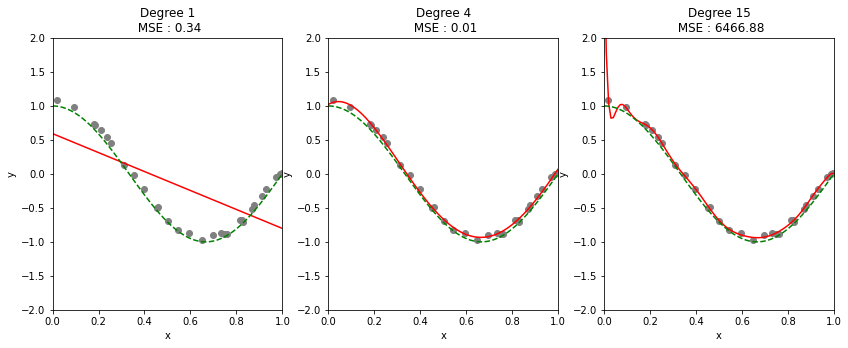

In [45]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees),i+1)
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression = LinearRegression()
    pipeline =Pipeline([('poly',polynomial_features),('linear',linear_regression)])
    pipeline.fit(X,y)

    #교차검증으로 다항회귀를 평가하자.
    scores = cross_val_score(pipeline, X,y,scoring='neg_mean_squared_error',cv=10)
    coefficients = pipeline.named_steps['linear'].coef_

    print('Degree {0} 회귀계수는 {1}입니다.'.format(degrees[i],np.around(coefficients,2)))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i],np.around(-np.mean(scores),2)))
    print('='*50)
    X_test = np.linspace(0,1,100)
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label='Model',color='red')
    plt.scatter(X,y,label='Samples', color='grey')
    plt.plot(X_test,true_func(X_test),label='true func',color='green', linestyle='dashed')
    plt.xlabel('x'); plt.xlim((0,1))
    plt.ylabel('y'); plt.ylim((-2,2))
    plt.title('Degree {}\n MSE : {}'.format(degrees[i],np.around(-np.mean(scores),2)))
    plt.savefig('underfitting_overfitting.png')


### 결론
- degree 1인 경우, 선형회귀랑 동일하다. 몇몇 샘플을 제대로 반영하지 못한다.
- degree 4인 경우, 실제 데이터와 유사하게 예측했다. mse 값이 가장 작게 도출되었다.
- degree 15인경우, mse가 매우크다. 예측곡선을 보면 데이터의세트의 변동잡음 값까지 지나치게 반영하여 데이터의분포와 다른 형태의 곡선이 만들어졌다. 또한 회귀계수값이 매우 큰값을 확인할 수있다.
<Br>
- **가장 좋은 예측모델은 학습데이터의 패턴을 잘 반영하며 복잡하지않은 Balanced model을 의미한다.**